## Introduction

Neural signals, like the example shown below, are analyzed in order to extract information about brain activity. Basically, we process these signals in order to extract features that will hopefully correlate with a behavior, pathology, or something else.

As the most prominent feature of these signals tends to be the oscillations in them, spectral analysis is often applied in order to characterize these rhythms in terms of their frequency, power, and phase.

The conventional approach to analyzing these properties as a function of time is to only study a narrowband signal by applying a wavelet transform or bandpass filtering followed by the Hilbert transform. The latter is demonstrated below.

### Analysis of amplitude and phase using the Hilbert transform

Text(0,0.5,'Phase (radians)')

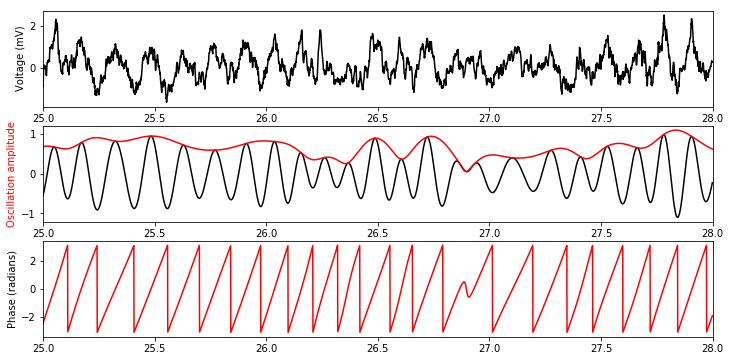

In [33]:
import numpy as np
import scipy as sp
from scipy import signal as spsignal
import matplotlib.pyplot as plt
from bycycle.filt import amp_by_time, phase_by_time
%matplotlib inline

# Load neural signal
signal = np.load('data/ca1.npy')
signal = signal[:125000] / 1000
Fs = 1250
f_theta = (4, 10)
N_seconds_filter = .75

# Compute amplitude and phase
signal_filt = bandpass_filter(signal, Fs, f_theta, N_seconds=N_seconds_filter)
theta_amp = amp_by_time(signal, Fs, f_theta,
                        filter_kwargs={'N_seconds': N_seconds_filter})
theta_phase = phase_by_time(signal, Fs, f_theta,
                            filter_kwargs={'N_seconds': N_seconds_filter})

# Plots signal
t = np.arange(0, len(signal)/Fs, 1/Fs)
tlim = (25, 28)
tidx = np.logical_and(t>=tlim[0], t<tlim[1])

plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
plt.plot(t[tidx], signal[tidx], 'k')
plt.xlim(tlim)
plt.ylabel('Voltage (mV)')

plt.subplot(3,1,2)
plt.plot(t[tidx], signal_filt[tidx], 'k')
plt.plot(t[tidx], theta_amp[tidx], 'r')
plt.xlim(tlim)
plt.ylabel('Oscillation amplitude', color='r')

plt.subplot(3,1,3)
plt.plot(t[tidx], theta_phase[tidx], 'r')
plt.xlim(tlim)
plt.ylabel('Phase (radians)')

This conventional analysis has some advantages and disadvantages. As for advantages:
    - Quick calculation
    - Neat mathematical theory
    - Results *largely* make sense
    - Defined at every point in time.
Because of this last property, these traces have come to be known as "instantaneous amplitude" and "instantaneous phase." And they seem to make a lot of sense, when looking at the raw signal.

However, there are some key disadvantages to this analysis that stem from its sine wave basis.
    1. Being defined at every point in time gives the illusion that the estimates are equally valid at all points in time. However, the amplitude and phase estimates are pretty garbage when there's no oscillation going on.
parameter tuning - filter length and bandwidth
fallacy - always an oscillation. Similar to measuring theta power when there is no theta oscillation. A change in theta power can mean many things